___
# K Means Clustering with Python


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

## Create some Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

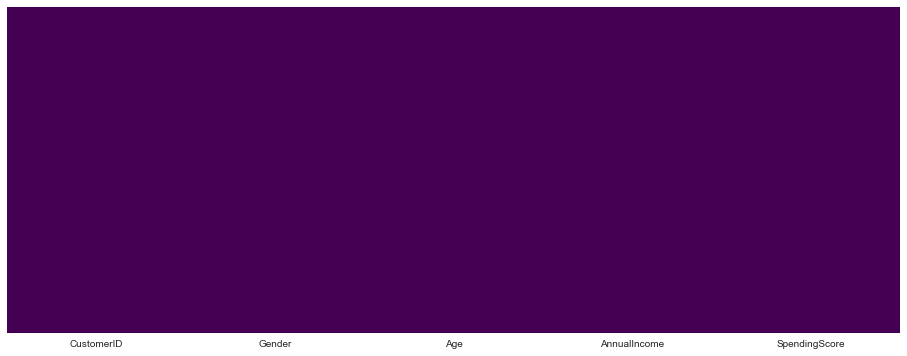

In [7]:
plt.rcParams["figure.figsize"] = (16,6)
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis');

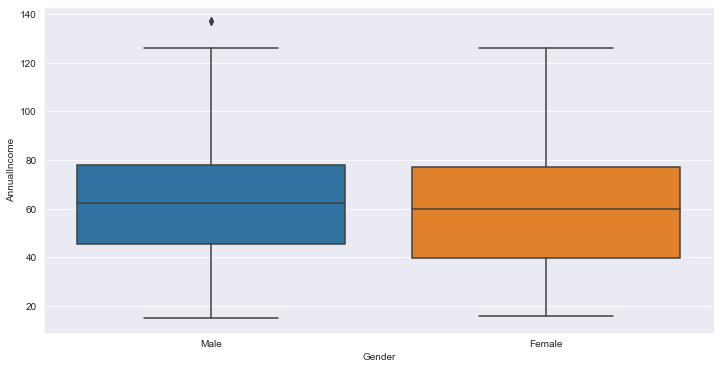

In [8]:
plt.rcParams["figure.figsize"] = (12,6)
sns.boxplot(x=df['Gender'], y=df['AnnualIncome']);

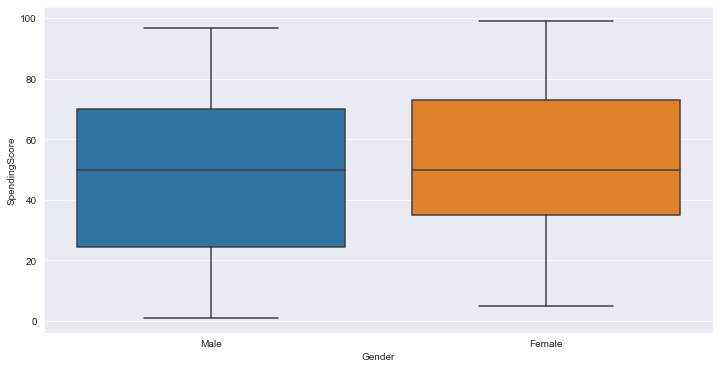

In [9]:
plt.rcParams["figure.figsize"] = (12,6)
sns.boxplot(x=df['Gender'], y=df['SpendingScore']);

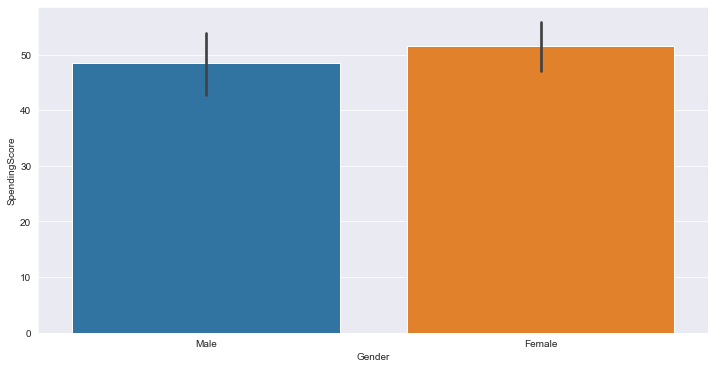

In [10]:
plt.rcParams["figure.figsize"] = (12,6)
sns.barplot(x=df['Gender'], y=df['SpendingScore']);

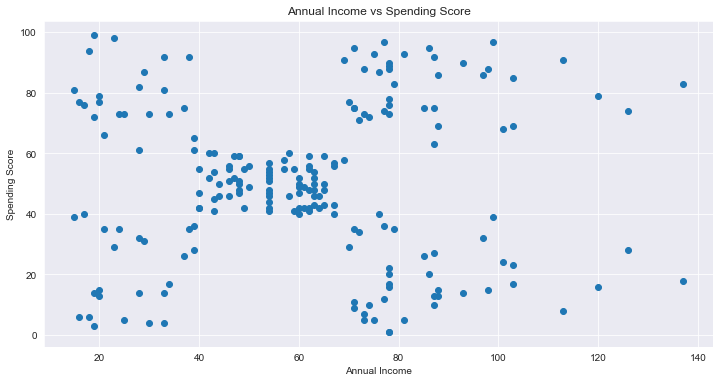

In [11]:
plt.scatter(x='AnnualIncome', y='SpendingScore', data=df);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')            
plt.show()

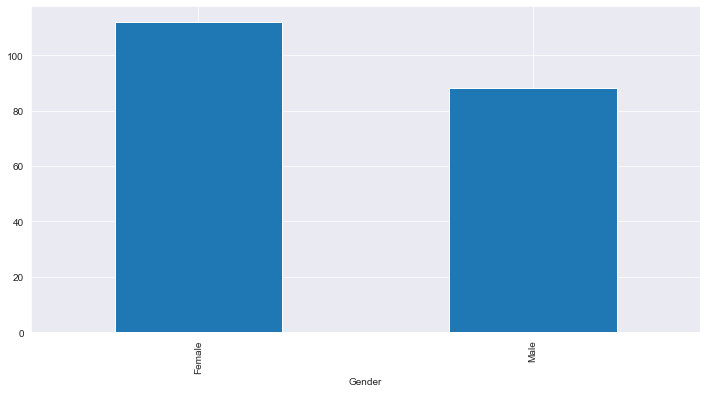

In [12]:
df.groupby(['Gender'])['SpendingScore'].count().plot.bar()
plt.show()

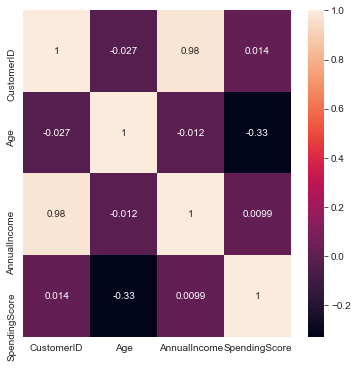

In [13]:
plt.rcParams["figure.figsize"] = (6,6)
sns.heatmap(df.corr(), annot=True,);

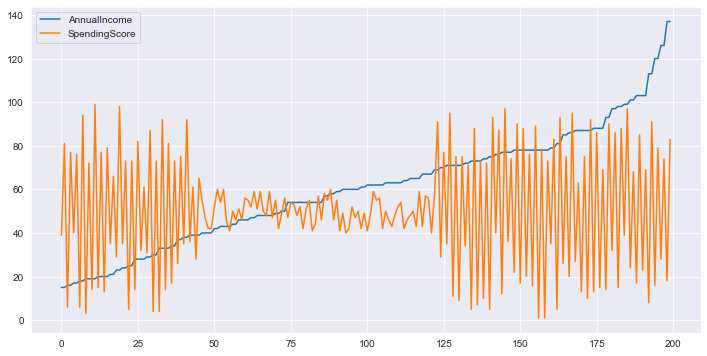

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
df_plot=df.loc[:,["AnnualIncome","SpendingScore"]]
df_plot.plot()
plt.show()

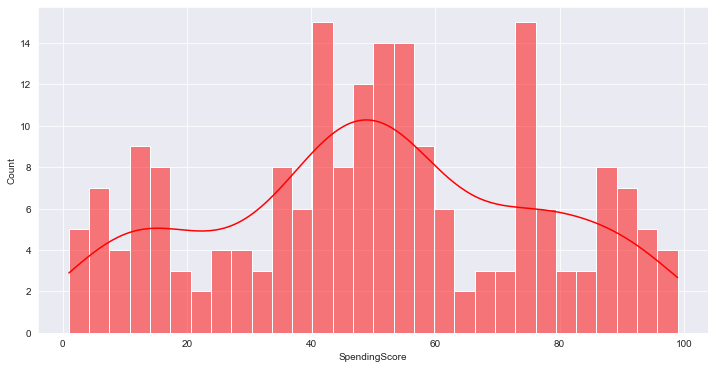

In [15]:
sns.histplot(df['SpendingScore'], bins=30, kde='False', color='red');

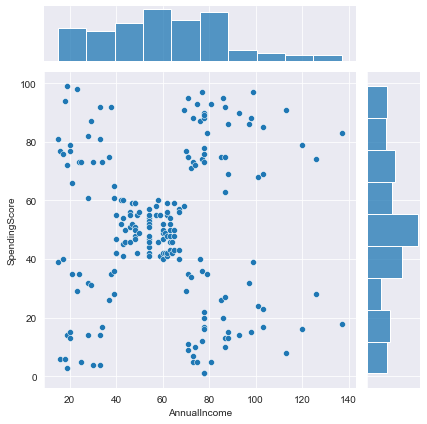

In [16]:
sns.jointplot(data=df, x='AnnualIncome', y='SpendingScore', kind="scatter");

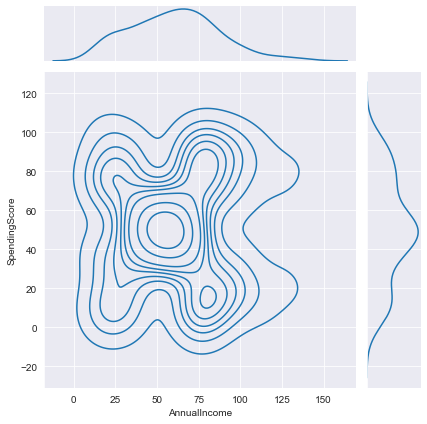

In [17]:
sns.jointplot(data=df, x='AnnualIncome', y='SpendingScore', kind="kde");

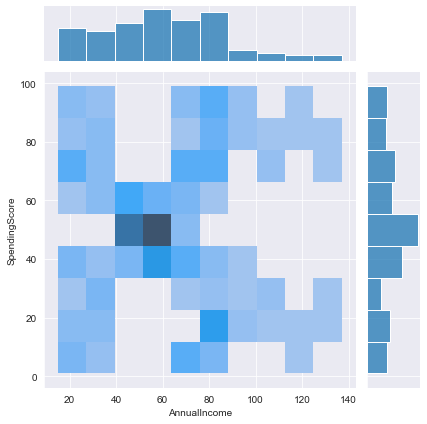

In [18]:
sns.jointplot(data=df, x='AnnualIncome', y='SpendingScore', kind="hist");

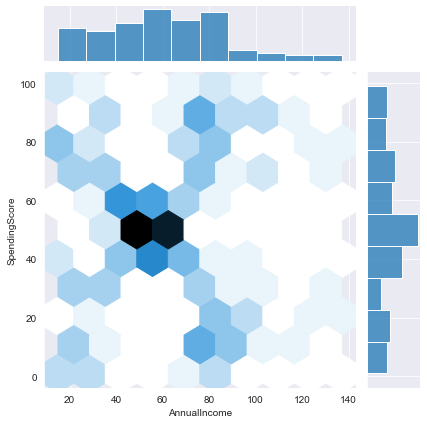

In [19]:
sns.jointplot(data=df, x='AnnualIncome', y='SpendingScore', kind="hex");

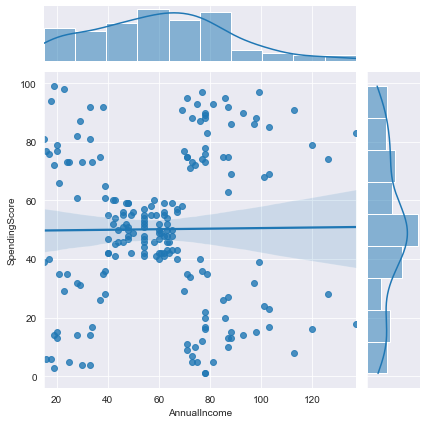

In [20]:
sns.jointplot(data=df, x='AnnualIncome', y='SpendingScore', kind="reg");

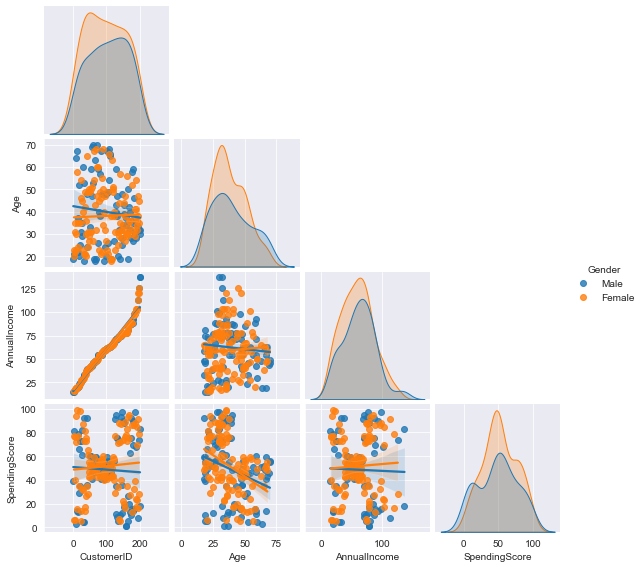

In [21]:
sns.pairplot(data=df,kind="reg", height=2, hue="Gender", corner=True);

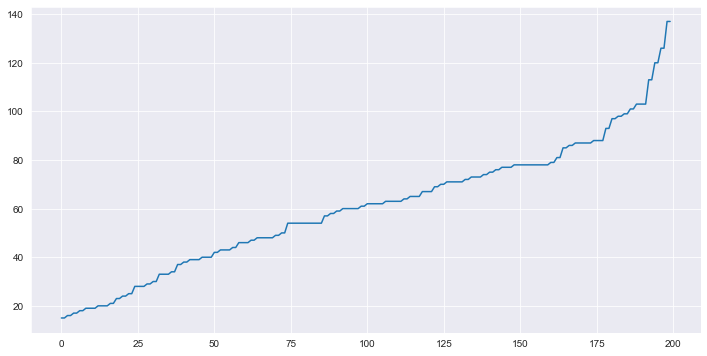

In [22]:
df['AnnualIncome'].plot();

In [23]:
df.iloc[:,3:5].head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Data Transformation
<img src="img_transformation.png" width=600, height=200>

In [24]:
#Using Data Transformation Technique (Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_stand= sc.fit_transform(df.iloc[:,2:5])

In [25]:
#Feature Scaling using minMax Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df_norm= sc.fit_transform(df.iloc[:,2:5])

In [26]:
#Using Data Transformation Technique (Standardization)
stand_AnnualIncome = (df["AnnualIncome"] - (df["AnnualIncome"].mean()))/df["AnnualIncome"].std()
stand_SpendingScore = (df["SpendingScore"] - (df["SpendingScore"].mean()))/df["SpendingScore"].std()
stand_Age = (df["Age"] - (df["Age"].mean()))/df["Age"].std()

In [27]:
df_stand_formula = pd.DataFrame({'stand_AnnualIncome': stand_AnnualIncome, 'stand_SpendingScore': stand_SpendingScore,"stand_Age":stand_Age})
df_stand_formula.head()

,stand_AnnualIncome,stand_SpendingScore,stand_Age
0,-1.734646,-0.433713,-1.421003
1,-1.734646,1.192711,-1.277829
2,-1.696572,-1.711618,-1.349416
3,-1.696572,1.037814,-1.134655
4,-1.658498,-0.394989,-0.561958


In [28]:
df_stand = pd.DataFrame({'stand_Age': df_stand[:,0], 'stand_SpendingScore': df_stand[:,1], 'stand_AnnualIncome': df_stand[:,2]})
df_stand.head()

,stand_Age,stand_SpendingScore,stand_AnnualIncome
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [29]:
df_stand.head()

,stand_Age,stand_SpendingScore,stand_AnnualIncome
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [30]:
#Using Data Transformation Technique (Normalization)
norm_AnnualIncome = (df["AnnualIncome"] - (df["AnnualIncome"].min()))/(df["AnnualIncome"].max()-df["AnnualIncome"].min())
norm_SpendingScore = (df["SpendingScore"] - (df["SpendingScore"].min()))/(df["SpendingScore"].max()-df["SpendingScore"].min())
norm_Age = (df["Age"] - (df["Age"].min()))/(df['Age'].max()-df["Age"].min())

In [31]:
df_norm_formula = pd.DataFrame({'stand_AnnualIncome': norm_AnnualIncome, 'stand_SpendingScore': norm_SpendingScore,'stand_Age': norm_Age})
df_norm_formula.head()

,stand_AnnualIncome,stand_SpendingScore,stand_Age
0,0.000000,0.387755,0.019231
1,0.000000,0.816327,0.057692
2,0.008197,0.051020,0.038462
3,0.008197,0.775510,0.096154
4,0.016393,0.397959,0.250000


In [32]:
df_norm = pd.DataFrame({'stand_AnnualIncome': df_norm[:,0], 'stand_SpendingScore': df_norm[:,1], 'stand_Age': df_norm[:,2]})

In [33]:
df_norm.head()

,stand_AnnualIncome,stand_SpendingScore,stand_Age
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


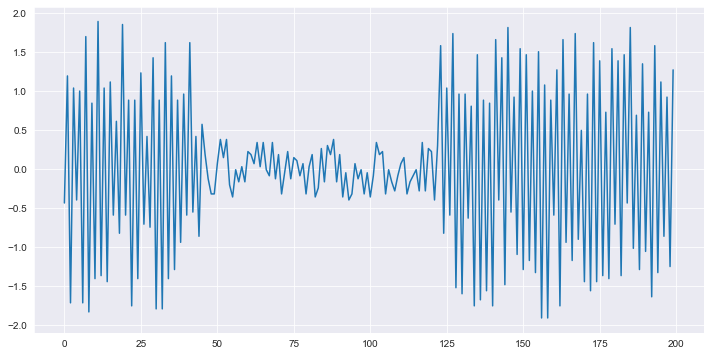

In [34]:
df_stand['stand_AnnualIncome'].plot();

In [35]:
from sklearn.cluster import KMeans

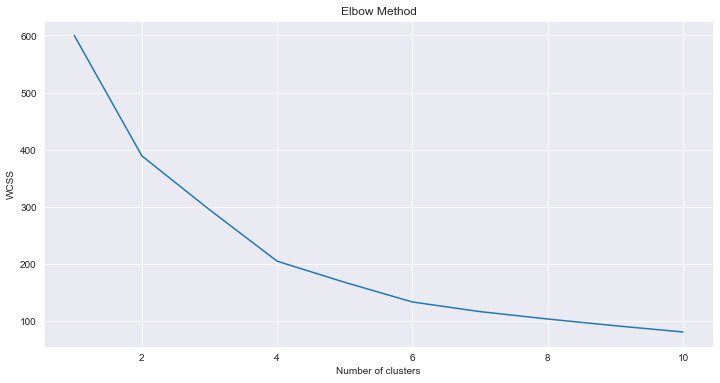

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_stand)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=9)

In [38]:
kmeans.fit(df_stand)

KMeans(n_clusters=9)

In [39]:
# 1st obj belongs to 4th cluster, 2nd obj belongs to 2nd cluster so on and so forth
kmeans.labels_

array([8, 2, 8, 2, 8, 2, 8, 2, 7, 2, 7, 2, 7, 2, 8, 2, 8, 2, 7, 2, 8, 2,
       7, 2, 7, 2, 8, 2, 8, 2, 7, 2, 7, 2, 7, 2, 8, 2, 8, 2, 3, 2, 0, 2,
       7, 2, 0, 5, 5, 5, 0, 5, 5, 3, 0, 0, 0, 3, 5, 0, 3, 5, 3, 0, 3, 5,
       0, 3, 5, 5, 3, 0, 3, 3, 3, 5, 0, 0, 5, 0, 3, 0, 3, 0, 5, 0, 0, 5,
       5, 0, 3, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 3, 5, 0, 5, 3, 0, 3, 3,
       3, 5, 0, 5, 5, 5, 3, 0, 0, 0, 5, 0, 0, 6, 5, 6, 0, 6, 4, 6, 4, 6,
       5, 6, 5, 6, 4, 6, 5, 6, 4, 6, 5, 6, 4, 6, 0, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 0, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [40]:
kmeans.cluster_centers_

array([[ 0.61233873, -0.14037369, -0.12080356],
       [-0.4589806 ,  1.81769762,  1.26275949],
       [-0.95652516, -1.30751869,  1.10118201],
       [ 1.86593393, -0.28283547, -0.01358755],
       [ 0.25716397,  1.1415204 , -1.32252117],
       [-1.04833736, -0.12200338, -0.13952234],
       [-0.43521371,  0.66703804,  1.23036618],
       [ 1.17338538, -1.28478299, -1.44416206],
       [-0.3415442 , -1.41282407, -0.96065717]])

In [41]:
df_real = sc.inverse_transform(df_stand).round().astype(int)
df_real = pd.DataFrame({'stand_AnnualIncome': df_real[:,0], 'stand_SpendingScore': df_real[:,1],"stand_Age":df_real[:,2]})

In [42]:
cluster_centers_real = sc.inverse_transform(kmeans.cluster_centers_).round().astype(int)

In [43]:
cluster_centers_real

array([[  50,   -2,  -11],
       [  -6,  237,  125],
       [ -32, -145,  109],
       [ 115,  -20,    0],
       [  31,  154, -129],
       [ -37,    0,  -13],
       [  -5,   96,  122],
       [  79, -142, -141],
       [   0, -157,  -93]])

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


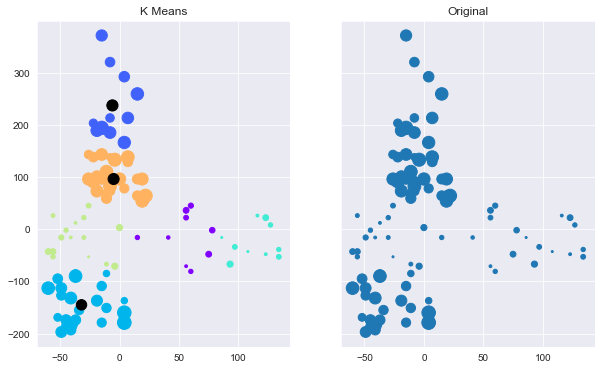

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df_real.iloc[:,0],df_real.iloc[:,1],df_real.iloc[:,2],c=kmeans.labels_,cmap='rainbow')
ax1.scatter(cluster_centers_real[:,0],cluster_centers_real[:,1],cluster_centers_real[:,2], color='black')
ax2.set_title("Original")
ax2.scatter(df_real.iloc[:,0],df_real.iloc[:,1],df_real.iloc[:,2],cmap='rainbow')